NAMA : A. MAKMUN ALJI

NIM  : 210411100241



# Graph dan Summarization

# Graph

Graph (graf) adalah struktur data yang digunakan untuk merepresentasikan hubungan antara objek. Dalam istilah sederhana, graf adalah kumpulan simpul (nodes) dan sisi (edges) yang menghubungkan pasangan simpul. Struktur ini sangat berguna dalam berbagai bidang, termasuk ilmu komputer, matematika, dan pemrosesan bahasa alami.


#Komponen Utama Graf

Simpul (Node): Simpul, juga dikenal sebagai vertex, adalah elemen dasar dalam graf. Setiap simpul mewakili entitas atau objek tertentu. Dalam konteks pemrosesan bahasa alami, simpul bisa mewakili kalimat, kata, atau dokumen.

Sisi (Edge): Sisi adalah hubungan antara dua simpul. Sisi dapat bersifat:

Arah (Directed): Menunjukkan bahwa hubungan dari satu simpul ke simpul lainnya memiliki arah tertentu. Misalnya, dalam graf yang menggambarkan hubungan antara kalimat, jika kalimat A mengarah ke kalimat B, ini menunjukkan bahwa A memberikan informasi yang relevan untuk B.

Tidak Arah (Undirected): Menunjukkan bahwa hubungan antara dua simpul tidak memiliki arah tertentu. Contohnya, jika dua kalimat saling berhubungan, kita dapat menggambarkannya dengan sisi yang tidak terarah.

Tipe-Tipe Graf

Graf Berarah (Directed Graph): Dalam graf berarah, setiap sisi memiliki arah, mengindikasikan hubungan satu arah antara dua simpul. Contohnya, graf yang menunjukkan hubungan antar situs web, di mana satu situs mengarah ke situs lainnya.

Graf Tidak Berarah (Undirected Graph): Dalam graf tidak berarah, hubungan antara simpul bersifat dua arah. Contohnya, graf sosial di mana simpul mewakili orang dan sisi mewakili pertemanan antara mereka.

Graf Berat (Weighted Graph): Dalam graf berat, setiap sisi memiliki bobot yang menunjukkan kekuatan atau jarak dari hubungan tersebut. Misalnya, dalam graf rute perjalanan, bobot bisa mewakili jarak atau waktu tempuh antara dua titik.

Graf Tidak Berat (Unweighted Graph): Dalam graf tidak berat, semua sisi dianggap setara dan tidak memiliki bobot.

Representasi Graf

Graf dapat direpresentasikan dalam beberapa cara, di antaranya:

Matriks Adjacency: Matriks persegi di mana elemen di baris dan kolom merepresentasikan simpul, dan nilai dalam matriks menunjukkan ada tidaknya hubungan antara simpul-simpul tersebut. Misalnya, jika ada sisi antara simpul A dan B, maka elemen matriks pada posisi (A, B) akan diisi dengan 1 (atau bobot) dan 0 jika tidak ada sisi.

Daftar Ketetanggaan (Adjacency List): Dalam representasi ini, setiap simpul memiliki daftar yang berisi semua simpul yang terhubung langsung dengan simpul tersebut. Ini lebih efisien dalam penggunaan memori, terutama untuk graf yang jarang terhubung (sparse).

# Implementasi

# Library

In [ ]:
import gdown
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SLM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Dataset

In [ ]:
# Nama file yang akan dibaca
file_name = 'kompas.csv'

# Membaca file CSV dari folder lokal
df = pd.read_csv(file_name)

# Tampilkan beberapa baris pertama dari file CSV
print(df.head())

                                               judul  \
0  MotoGP San Marino 2024: Ketika Marquez Menang ...   
1  Klasemen PON XXI 2024: Futsal Gagal Emas, Jati...   
2  Hasil One Pride MMA 82: Frans Sormin Bekuk Jak...   
3  Indonesia Vs Australia, Kata Manajer Timnas so...   
4  Dampak Kehadiran Marteen Paes untuk Persaingan...   

                      waktu  \
0   - 09/09/2024, 05:00 WIB   
1   - 09/09/2024, 07:59 WIB   
2   - 09/09/2024, 14:31 WIB   
3   - 09/09/2024, 10:29 WIB   
4   - 09/09/2024, 11:30 WIB   

                                                 url  \
0  https://www.kompas.com/motogp/read/2024/09/09/...   
1  https://www.kompas.com/sports/read/2024/09/09/...   
2  https://www.kompas.com/sports/read/2024/09/09/...   
3  https://bola.kompas.com/read/2024/09/09/102929...   
4  https://bola.kompas.com/read/2024/09/09/113000...   

                                              konten kategori  
0  KOMPAS.com - Marc Marquez sukses memenangi Mot...     Bola  
1  KOMPAS.c

In [ ]:
df

,judul,waktu,url,konten,kategori
0,MotoGP San Marino 2024: Ketika Marquez Menang ...,"- 09/09/2024, 05:00 WIB",https://www.kompas.com/motogp/read/2024/09/09/...,KOMPAS.com - Marc Marquez sukses memenangi Mot...,Bola
1,"Klasemen PON XXI 2024: Futsal Gagal Emas, Jati...","- 09/09/2024, 07:59 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Tim futsal Jawa Timur (Jatim) gag...,Bola
2,Hasil One Pride MMA 82: Frans Sormin Bekuk Jak...,"- 09/09/2024, 14:31 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Frans Lincol Sormin mengalahkan J...,Bola
3,"Indonesia Vs Australia, Kata Manajer Timnas so...","- 09/09/2024, 10:29 WIB",https://bola.kompas.com/read/2024/09/09/102929...,KOMPAS.com - Timnas Indonesia belum menentukan...,Bola
4,Dampak Kehadiran Marteen Paes untuk Persaingan...,"- 09/09/2024, 11:30 WIB",https://bola.kompas.com/read/2024/09/09/113000...,KOMPAS.com - Penampilan penjaga gawang timnas ...,Bola
...,...,...,...,...,...
146,Penurunan Apa Saja yang Terjadi pada Lansia? I...,"- 05/09/2024, 18:00 WIB",https://health.kompas.com/read/24I05180000468/...,"KOMPAS.com - Seiring bertambahnya umur, setiap...",Health
147,Apakah Minum Kopi Pahit Bagus untuk Kesehatan?...,"- 05/09/2024, 16:00 WIB",https://health.kompas.com/read/24I05160000768/...,KOMPAS.com - Kopi kerap diminum untuk mengatas...,Health
148,"Sering Digunakan untuk Diet, Ini Manfaat Keseh...","- 05/09/2024, 13:37 WIB",https://health.kompas.com/read/24I05133717468/...,"KOMPAS.com - Dalam beberapa tahun terakhir, cu...",Health
149,"Kenali ""BEACH"", Akronim untuk Tanda Peringatan...","- 05/09/2024, 14:00 WIB",https://health.kompas.com/read/24I05140000068/...,KOMPAS.com - Gejala kanker ovarium sering kali...,Health


In [ ]:
berita = df["konten"].iloc[3]

# Preprocessing

Preprocessing data adalah serangkaian langkah atau teknik yang diterapkan pada data mentah untuk mempersiapkannya sebelum dianalisis atau digunakan dalam model machine learning. Proses ini penting karena data mentah sering kali memiliki berbagai masalah, seperti noise, kesalahan, atau ketidakkonsistenan, yang dapat memengaruhi kualitas analisis atau performa model. Berikut adalah langkah-langkah umum dalam preprocessing data:

 - Lower Case
 - Clean Text
 - Tokenisasi
 - Stopword Removal


# Lower Case

Tahapan pertama yang biasanya dilakukan adalah tahapan case folding. Tahapan ini hampir selalu disertakan ketika melakukan text preprocessing. Mengapa? Karena data yang kita miliki tidak selalu terstruktur dan konsisten dalam penggunaan huruf kapital. Jadi, peran dari case folding adalah untuk menyamaratakan penggunaan huruf kapital. Misalnya data teks yang kita dapat berupa tulisan "DaTA SCIence" maka dengan case folding artinya kita mengubah semua huruf menjadi huruf kecil (lowercase) semua. Sementara itu, karakter lain yang bukan termasuk huruf dan angka, seperti tanda baca dan spasi dianggap sebagai delimiter. Delimiter ini bisa juga dihapus atau diabaikan dengan menggunakan perintah yang ada di Python.

In [ ]:
# Ubah teks menjadi lowercase
berita_lower = berita.lower()
berita_lower

'kompas.com - timnas indonesia belum menentukan warna jersey yang akan digunakan untuk menjamu australia pada laga kedua putaran ketiga kualifikasi piala dunia 2026 zona asia di stadion utama gelora bung karno (sugbk), jakarta, selasa (10/9/2024) besok malam.\npada laga terakhir, menggunakan jersey putih, indonesia berhasil mencuri poin dari kandang arab saudi di stadion king abdullah sports city, jeddah, jumat (6/9/2024) lalu.\nbisa mencuri poin di kandang arab saudi menjadi awal yang baik bagi timnas indonesia.\nterlebih lagi, arab saudi mempunyai sejarah tampil di piala dunia dan salah satu tim paling sukses di asia. kini, mereka pun ditangani pelatih berpengalaman, roberto mancini.\nindonesia, yang dianggap sebagai underdog di grup c kualifikasi piala dunia 2026 zona asia, mampu menahan imbang arab saudi 1-1, bahkan sempat unggul terlebih dahulu.\nbaca juga: 4 fakta menarik indonesia vs australia di kualifikasi piala dunia 2026\n\n\n\n\nadapun saat memakai jersey merah, indonesia j

# Cleansing Text

Data cleansing atau data cleaning merupakan suatu proses mendeteksi dan memperbaiki (atau menghapus) suatu record yang ‘corrupt’ atau tidak akurat berdasarkan sebuah record set, tabel, atau database. Selain itu, data cleansing juga berguna untuk mengidentifikasi bagian data mana yang tidak lengkap, tidak tepat, tidak akurat atau tidak relevan, yang selanjutnya untuk data-data “kotor” tersebut akan diganti, dimodifikasi, atau dihapus

In [ ]:
# Bersihkan teks dengan menghapus tanda baca dan karakter khusus, kecuali titik
berita_cleaned = re.sub(r'[^\w\s.]', '', berita_lower)
berita_cleaned = berita_cleaned.replace('\n', ' ')
berita_cleaned

'kompas.com  timnas indonesia belum menentukan warna jersey yang akan digunakan untuk menjamu australia pada laga kedua putaran ketiga kualifikasi piala dunia 2026 zona asia di stadion utama gelora bung karno sugbk jakarta selasa 1092024 besok malam. pada laga terakhir menggunakan jersey putih indonesia berhasil mencuri poin dari kandang arab saudi di stadion king abdullah sports city jeddah jumat 692024 lalu. bisa mencuri poin di kandang arab saudi menjadi awal yang baik bagi timnas indonesia. terlebih lagi arab saudi mempunyai sejarah tampil di piala dunia dan salah satu tim paling sukses di asia. kini mereka pun ditangani pelatih berpengalaman roberto mancini. indonesia yang dianggap sebagai underdog di grup c kualifikasi piala dunia 2026 zona asia mampu menahan imbang arab saudi 11 bahkan sempat unggul terlebih dahulu. baca juga 4 fakta menarik indonesia vs australia di kualifikasi piala dunia 2026     adapun saat memakai jersey merah indonesia juga mempunyai catatan baik saat berm

# Tokenisasi

Kita ambil contoh adalah data tweet atau kumpulan dataset pesan spam pasti terdiri dari kalimat. Nah, untuk memudahkan proses analisis data kita harus memecah kalimat-kalimat tersebut menjadi kata atau disebut dengan token. Dengan tokenizing kita dapat membedakan mana antara pemisah kata atau bukan. Jika menggunakan bahasa pemrograman python biasanya tokenizing juga mencakup proses removing number, removing punctuation seperti simbol dan tanda baca yang tidak penting, serta removing whitespace.

In [ ]:
# Tokenisasi teks
berita_tokenized = sent_tokenize(berita_cleaned)
berita_tokenized

['kompas.com  timnas indonesia belum menentukan warna jersey yang akan digunakan untuk menjamu australia pada laga kedua putaran ketiga kualifikasi piala dunia 2026 zona asia di stadion utama gelora bung karno sugbk jakarta selasa 1092024 besok malam.',
 'pada laga terakhir menggunakan jersey putih indonesia berhasil mencuri poin dari kandang arab saudi di stadion king abdullah sports city jeddah jumat 692024 lalu.',
 'bisa mencuri poin di kandang arab saudi menjadi awal yang baik bagi timnas indonesia.',
 'terlebih lagi arab saudi mempunyai sejarah tampil di piala dunia dan salah satu tim paling sukses di asia.',
 'kini mereka pun ditangani pelatih berpengalaman roberto mancini.',
 'indonesia yang dianggap sebagai underdog di grup c kualifikasi piala dunia 2026 zona asia mampu menahan imbang arab saudi 11 bahkan sempat unggul terlebih dahulu.',
 'baca juga 4 fakta menarik indonesia vs australia di kualifikasi piala dunia 2026     adapun saat memakai jersey merah indonesia juga mempuny

# Stopword Removal

Stopword adalah kata-kata yang sering muncul dalam suatu bahasa yang sering dihilangkan dari tugas pemrosesan bahasa alami (NLP) karena tidak terlalu penting dalam mengartikan makna tekstual. Daftar stopword tertentu dapat berubah berdasarkan bahasa yang dipelajari dan konteksnya. Berikut ini adalah daftar umum kategori stopword:

Stopword Umum: Ini adalah kata-kata yang paling sering muncul dalam suatu bahasa dan sering dihilangkan selama praproses teks. Contohnya termasuk “the,” “is,” “in,” “for,” “where,” “when,” “to,” “at,” dll.
Stopword Kustom: Bergantung pada tugas atau domain tertentu, kata-kata tambahan dapat dianggap sebagai stopword. Ini bisa berupa istilah khusus domain yang tidak banyak berkontribusi pada makna keseluruhan. Misalnya, dalam konteks medis, kata-kata seperti "pasien" atau "perawatan" dapat dianggap sebagai stopword kustom.
Stopword Numerik: Angka dan karakter numerik dapat dianggap sebagai stopword dalam kasus tertentu, khususnya ketika analisis terfokus pada makna teks dan bukan pada nilai numerik tertentu.
Stopword Karakter Tunggal: Karakter tunggal, seperti “a,” “I,” “s,” atau “x,” dapat dianggap sebagai stopword, khususnya dalam kasus di mana karakter tersebut tidak menyampaikan banyak makna dengan sendirinya.
Kata-kata Penghenti Kontekstual: Kata-kata yang merupakan kata-kata penghenti dalam satu konteks tetapi bermakna dalam konteks lain dapat dianggap sebagai kata-kata penghenti kontekstual. Misalnya, kata "akan" mungkin merupakan kata-kata penghenti dalam konteks menerjemahkan bahasa umum tetapi dapat menjadi penting dalam memprediksi kejadian di masa mendatang.

In [ ]:
# Hapus stopwords
stop_words = set(stopwords.words('indonesian'))

custom_stopwords = {'kompas.com'}
stop_words.update(custom_stopwords)

In [ ]:
print(stop_words)

{'apaan', 'tepat', 'yaitu', 'saling', 'bahwasanya', 'itu', 'seluruhnya', 'sebuah', 'berakhir', 'semampunya', 'ditunjuk', 'mengatakannya', 'pukul', 'setiba', 'kelihatannya', 'tanpa', 'seketika', 'turut', 'belum', 'pertanyakan', 'saja', 'sebetulnya', 'hendaknya', 'mana', 'pihak', 'tampak', 'kan', 'segalanya', 'disebut', 'enggak', 'tuturnya', 'berbagai', 'diperlihatkan', 'jelas', 'satu', 'menandaskan', 'lima', 'minta', 'berkali-kali', 'guna', 'mengibaratkannya', 'menyangkut', 'semula', 'tahun', 'diminta', 'merekalah', 'mampukah', 'asalkan', 'diibaratkan', 'memihak', 'ingat', 'menjadi', 'sepertinya', 'disini', 'mulai', 'sesuatunya', 'sayalah', 'menyebutkan', 'terkira', 'ataukah', 'sepantasnyalah', 'yakni', 'sedangkan', 'cukup', 'semakin', 'bagi', 'beginian', 'bukanlah', 'ditandaskan', 'terhadap', 'dini', 'ditunjukkan', 'lagian', 'terjadinya', 'rupanya', 'menyeluruh', 'merasa', 'olehnya', 'selama', 'seberapa', 'setidak-tidaknya', 'tanyakan', 'benarlah', 'jikalau', 'memberi', 'haruslah', 'an

In [ ]:
# Proses setiap kalimat, menghapus stopwords
berita_no_stopwords = []
for sentence in berita_tokenized:
    # Tokenisasi kata di dalam setiap kalimat
    words = sentence.split()
    # Hapus stopwords
    words_no_stop = [word for word in words if word not in stop_words]
    # Gabungkan kembali kata-kata tanpa stopwords menjadi kalimat
    cleaned_sentence = ' '.join(words_no_stop)
    berita_no_stopwords.append(cleaned_sentence)

berita_no_stopwords

['timnas indonesia menentukan warna jersey menjamu australia laga putaran ketiga kualifikasi piala dunia 2026 zona asia stadion utama gelora karno sugbk jakarta selasa 1092024 besok malam.',
 'laga jersey putih indonesia berhasil mencuri poin kandang arab saudi stadion king abdullah sports city jeddah jumat 692024 lalu.',
 'mencuri poin kandang arab saudi timnas indonesia.',
 'arab saudi sejarah tampil piala dunia salah tim sukses asia.',
 'ditangani pelatih berpengalaman roberto mancini.',
 'indonesia dianggap underdog grup c kualifikasi piala dunia 2026 zona asia menahan imbang arab saudi 11 unggul dahulu.',
 'baca 4 fakta menarik indonesia vs australia kualifikasi piala dunia 2026 memakai jersey merah indonesia catatan bermain kandang.',
 '2024 garuda mencatatkan kemenangan kalah bermain kandang.',
 'terkait warna jersey lawan australia manajer timnas sumardji berdiskusi ketua pssi erick thohir.',
 'malam kemarin lapor ketum instingnya terbaik.',
 'instingnya begitu.',
 'instingnya 

# TF-IDF

In [ ]:
vect = TfidfVectorizer()
vect_matrix = vect.fit_transform(berita_no_stopwords)

In [ ]:
terms = vect.get_feature_names_out()
tfidf = pd.DataFrame(data=vect_matrix.toarray(), columns=terms)
tfidf

,10,1092024,11,2024,2026,692024,892024,abdullah,akses,allah,...,tuturnya,ucapnya,underdog,unggul,utama,vs,warna,whatsapp,ya,zona
0,0.000000,0.222637,0.00000,0.00000,0.177807,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.222637,0.000000,0.196413,0.000000,0.000000,0.196413
1,0.000000,0.000000,0.00000,0.00000,0.000000,0.259709,0.000000,0.259709,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.28251,0.00000,0.225624,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.28251,0.28251,0.000000,0.000000,0.000000,0.000000,0.000000,0.249234
6,0.000000,0.000000,0.00000,0.00000,0.220320,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.275869,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.39788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.267739,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#  Cosine Similarity

In [ ]:
# Menghitung cosine similarity antara semua pasangan kalimat
cosine = cosine_similarity(vect_matrix, vect_matrix)

# Membuat DataFrame untuk cosine similarity
cosine_sim = pd.DataFrame(cosine, columns=range(len(berita_no_stopwords)), index=range(len(berita_no_stopwords)))

# Menampilkan matriks cosine similarity
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.123957,0.110273,0.133131,0.0,0.253067,0.246535,0.000000,0.156678,0.077705,...,0.155464,0.058528,0.0,0.000000,0.000000,0.094959,0.000000,0.000000,0.000000,0.000000
1,0.123957,1.000000,0.421047,0.086151,0.0,0.093381,0.129766,0.055644,0.036537,0.000000,...,0.079465,0.063931,0.0,0.197645,0.000000,0.060062,0.000000,0.000000,0.000000,0.000000
2,0.110273,0.421047,1.000000,0.174220,0.0,0.188841,0.195258,0.112526,0.085830,0.000000,...,0.209469,0.129285,0.0,0.399690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.133131,0.086151,0.174220,1.000000,0.0,0.262647,0.097728,0.000000,0.000000,0.000000,...,0.051535,0.194508,0.0,0.070020,0.000000,0.107830,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.253067,0.093381,0.188841,0.262647,0.0,1.000000,0.234739,0.000000,0.000000,0.000000,...,0.048339,0.194905,0.0,0.133384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.246535,0.129766,0.195258,0.097728,0.0,0.234739,1.000000,0.144534,0.083894,0.000000,...,0.094405,0.072522,0.0,0.000000,0.000000,0.053863,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.055644,0.112526,0.000000,0.0,0.000000,0.144534,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.156678,0.036537,0.085830,0.000000,0.0,0.000000,0.083894,0.000000,1.000000,0.000000,...,0.103670,0.000000,0.0,0.000000,0.000000,0.118511,0.000000,0.000000,0.000000,0.000000
9,0.077705,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.158080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#  Matrik Adjensi

In [ ]:
# Mengatur threshold untuk membangun matriks adjensi
threshold = 0.2

# Menangani nilai NaN pada cosine_sim
cosine_sim_filled = cosine_sim.fillna(0)

# Membuat matriks adjensi berdasarkan cosine similarity
adjacency = (cosine_sim_filled.values > threshold).astype(int)

adjacency_matrix = pd.DataFrame(adjacency,
                             columns=[f'{i}' for i in range(len(berita_no_stopwords))],
                             index=[f'{i}' for i in range(len(berita_no_stopwords))])

adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Graph

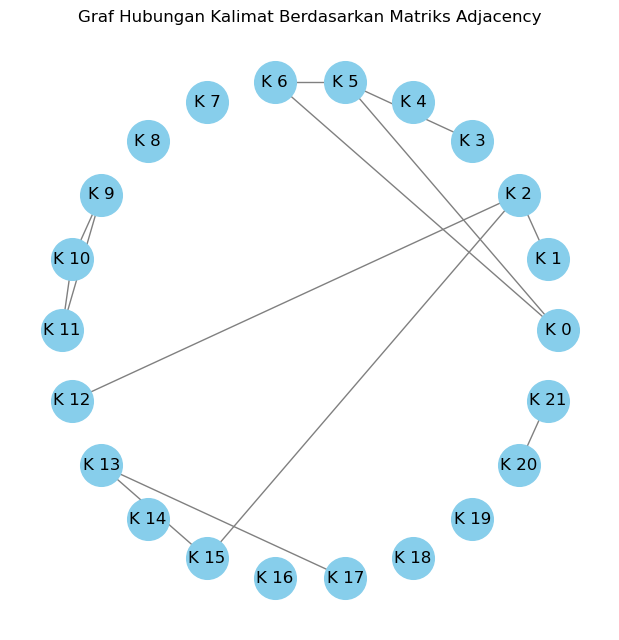

In [ ]:
# Membuat graf
G = nx.Graph()

# Tambahkan node (kalimat)
for i in range(len(adjacency_matrix)):
    G.add_node(i)

# Tambahkan edge (hubungan) antara kalimat berdasarkan matriks adjensi
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
        similarity = adjacency_matrix.iloc[i, j]
        if similarity > 0 and i != j:
            G.add_edge(i, j, weight=similarity)

# Visualisasikan grafik dengan tata letak "circular"
pos = nx.circular_layout(G)

# Membuat label node yang hanya menggunakan nomor indeks
labels = {i: f'K {i}' for i in G.nodes()}

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=900, node_color='skyblue', edge_color='gray')
plt.title('Graf Hubungan Kalimat Berdasarkan Matriks Adjacency')
plt.show()

#  Closeness Centrality

In [ ]:
# Menghitung Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Mengonversi hasil Closeness Centrality menjadi DataFrame untuk kemudahan pembacaan
closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dalam urutan menurun
closeness_centrality_df = closeness_centrality_df.sort_values(by='Closeness Centrality', ascending=False)

# Menampilkan hasil
closeness_centrality_df

,Node,Closeness Centrality
2,2,0.148810
15,15,0.148810
5,5,0.142857
13,13,0.119048
0,0,0.107143
6,6,0.107143
12,12,0.099206
1,1,0.099206
10,10,0.095238
11,11,0.095238


# Hasil Rangkuman Dokumen

In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_closeness = closeness_centrality_df.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_closeness = top_three_closeness['Node']

# Membuat daftar kalimat berdasarkan indeks node
extracted_sentences = [berita_tokenized[node_index] for node_index in top_node_closeness if 0 <= node_index < len(berita_tokenized)]

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_closeness:
    if 0 <= node_index < len(berita_tokenized):
        print(f"K{node_index}: {berita_tokenized[node_index]}")

K2: bisa mencuri poin di kandang arab saudi menjadi awal yang baik bagi timnas indonesia.
K15: anakanak dengan hasil imbang kemarin kami bisa mencuri poin di arab.
K5: indonesia yang dianggap sebagai underdog di grup c kualifikasi piala dunia 2026 zona asia mampu menahan imbang arab saudi 11 bahkan sempat unggul terlebih dahulu.
